# Credit Prediction

- checking_status: status of existing checking account { '<0'    '0<=X<200'      '>=200'             'no checking'}   
- duration: duratons of the credit in months                                                                                                             
- credit_history: credit history of the applicant { 'no credits/all paid'       'all paid'          'existing paid'  'delayed previously'    'critical/other existing credit'} 
- purpose: purpose of the credit { 'new car'         'used car'        furniture/equipment  radio/tv           'domestic appliance'  repairs             education             vacation          retraining        business          other}
- credit_amount: credit amount in numbers
- savings_status: applicants savings accounts and bonds { '<100'  '100<=X<500'  '500<=X<1000'  '>=1000'  'no known savings'}
- employment: present employment since number of years { unemployed  '<1' '1<=X<4'  '4<=X<7'  '>=7'} 
- installment_commitment: instalment rate in percentage of disposable income 
- personal_status: personal status and gender { 'male div/sep'  'female div/dep/mar'  'male single'  'male mar/wid'  'female single'} 
- other_parties: other debtors or guarantors { none      'co applicant'  guarantor} 
- esidence_since: number of years the applicant has been living at their present residence
- property_magnitude: properties the applicant owns currently { 'real estate'        'life insurance'    car       'no known property'} 
- age: applicants age in numbers 
- other_payment_plans: other payment plans the applicant is currently on { bank    stores  none} 
- housing: the kind of housing the applicant currently lives in/ pays { rent     own     'for free'} 
- existing_credits: number of existing credits at this bank
- job: type of employment { 'unemp/unskilled non res'  'unskilled resident'   skilled  'high qualif/self emp/mgmt'} 
- num_dependents: number of people being liable to provide maintenance for
- own_telephone: applicant owns their own telephone { none   yes}
- foreign_worker: applicant is a foreign worker { yes      no}  
- class: { good   bad} 

# 1. Data Exploration
In this part we gain an initial insight into our dataset and get to know the different attributes.

In [1]:
#pip install --upgrade threadpoolctl

In [2]:
# import libarys numpy, pandas, matplot, seaborn 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm 
%matplotlib inline

In [16]:
# load dato into dataframe
df = pd.read_csv("credit_data.csv", sep = ";")
df

,checking_status,duration,credit_history,purpose,credit_amaount,savings_status,employment,installment_commitment,personal_status,oter_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [17]:
#show information of whole dataframe and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amaount          1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   oter_parties            1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [18]:
# Determine the dimensions of the dataframe: How many entries and columns does the datafr
def shape(x):
    rows, cols = df.shape
    print(f'The dataframe has {rows} rows and {cols} columns')
shape(df)

The dataframe has 1000 rows and 21 columns


In [19]:
# Summary statistics
df.describe()

,duration,credit_amaount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [26]:
# transform 'booking_status' into numerical values
df['class'] = df['class'].map({'bad': 0, 'good': 1})
df['class']

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: int64

In [27]:
# Summary statistics for the label
df['class'].describe()

count    1000.000000
mean        0.700000
std         0.458487
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: class, dtype: float64

#### Exploration of numerical values

In [28]:
# create a df with all numerical values
df_num = df.select_dtypes(include=['int64', 'float64'])

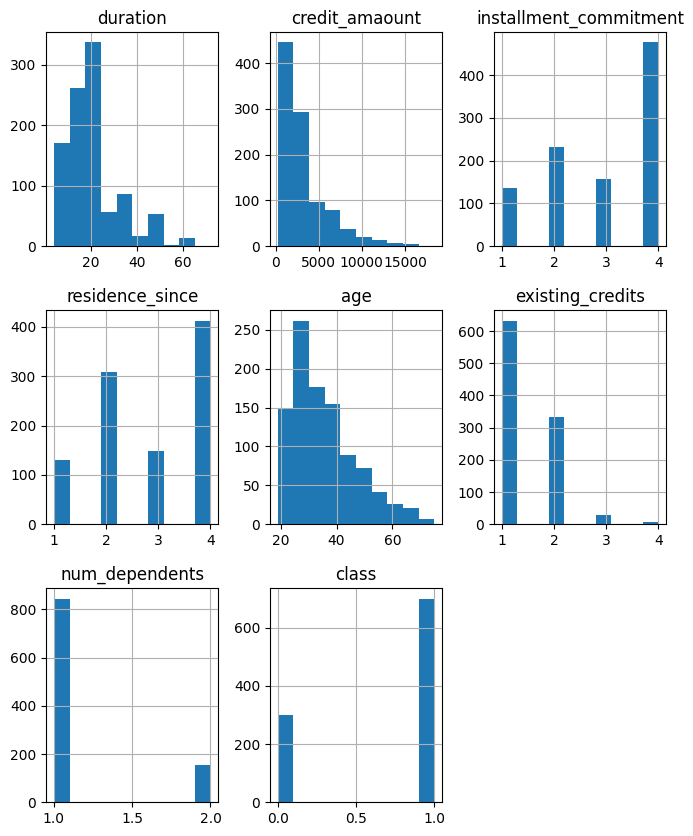

In [29]:
#plot distribution of all numerical attributes in form of histograms
df_num.hist(figsize=[8, 10]);  # the ; hides the output message

<Axes: >

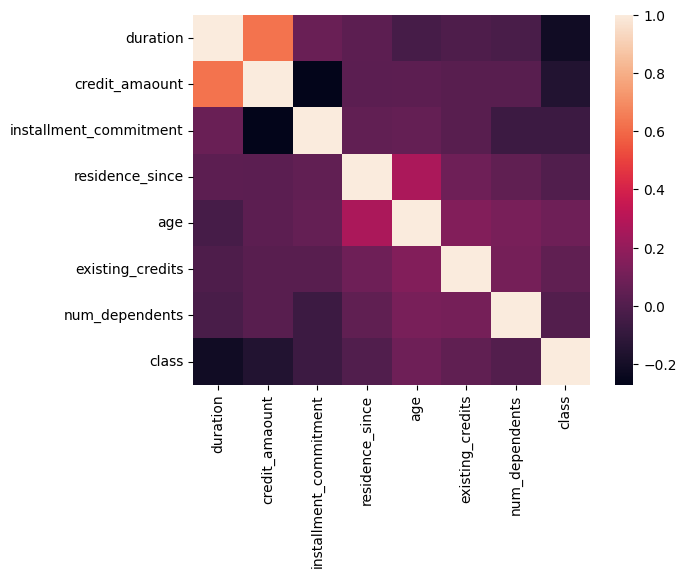

In [30]:
sns.heatmap(df_num.corr()) #heatmap to spot correlations in data

#### Exploration of categorical values

In [31]:
# create a df with all categorical values
df_cat = df.select_dtypes(include=['object'])
df_cat

,checking_status,credit_history,purpose,savings_status,employment,personal_status,oter_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
0,'<0','critical/other existing credit',radio/tv,'no known savings','>=7','male single',none,'real estate',none,own,skilled,yes,yes
1,'0<=X<200','existing paid',radio/tv,'<100','1<=X<4','female div/dep/mar',none,'real estate',none,own,skilled,none,yes
2,'no checking','critical/other existing credit',education,'<100','4<=X<7','male single',none,'real estate',none,own,'unskilled resident',none,yes
3,'<0','existing paid',furniture/equipment,'<100','4<=X<7','male single',guarantor,'life insurance',none,'for free',skilled,none,yes
4,'<0','delayed previously','new car','<100','1<=X<4','male single',none,'no known property',none,'for free',skilled,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking','existing paid',furniture/equipment,'<100','4<=X<7','female div/dep/mar',none,'real estate',none,own,'unskilled resident',none,yes
996,'<0','existing paid','used car','<100','1<=X<4','male div/sep',none,'life insurance',none,own,'high qualif/self emp/mgmt',yes,yes
997,'no checking','existing paid',radio/tv,'<100','>=7','male single',none,car,none,own,skilled,none,yes
998,'<0','existing paid',radio/tv,'<100','1<=X<4','male single',none,'no known property',none,'for free',skilled,yes,yes


In [32]:
def get_unique_values(df):
    unique_values = {}
    for column in df:
        unique_count = df[column].nunique()
        
        if pd.api.types.is_numeric_dtype(df[column]) or pd.api.types.is_datetime64_any_dtype(df[column]):
            unique_values[column] = f"Numerische oder Datumsattribute ({unique_count} verschiedene Werte)"
        elif unique_count <= 10:
            unique_values[column] = sorted(df[column].dropna().unique())
        else:
            unique_values[column] = f"Zu viele ({unique_count}) verschiedene Werte für {column}"
    return unique_values

# Beispiel: Annahme, df_cat ist dein DataFrame mit kategorischen Daten
unique_values = get_unique_values(df_cat)

for column, values in unique_values.items():
    print("--")
    print(f"Unique Values in '{column}':")
    print(values)


--
Unique Values in 'checking_status':
["'0<=X<200'", "'<0'", "'>=200'", "'no checking'"]
--
Unique Values in 'credit_history':
["'all paid'", "'critical/other existing credit'", "'delayed previously'", "'existing paid'", "'no credits/all paid'"]
--
Unique Values in 'purpose':
["'domestic appliance'", "'new car'", "'used car'", 'business', 'education', 'furniture/equipment', 'other', 'radio/tv', 'repairs', 'retraining']
--
Unique Values in 'savings_status':
["'100<=X<500'", "'500<=X<1000'", "'<100'", "'>=1000'", "'no known savings'"]
--
Unique Values in 'employment':
["'1<=X<4'", "'4<=X<7'", "'<1'", "'>=7'", 'unemployed']
--
Unique Values in 'personal_status':
["'female div/dep/mar'", "'male div/sep'", "'male mar/wid'", "'male single'"]
--
Unique Values in 'oter_parties':
["'co applicant'", 'guarantor', 'none']
--
Unique Values in 'property_magnitude':
["'life insurance'", "'no known property'", "'real estate'", 'car']
--
Unique Values in 'other_payment_plans':
['bank', 'none', 'stores

# 2. Data Cleansing

The goal of this part is to detect and correct or remove invalid/ erroneous data.

In [33]:
print(df.duplicated())  #check whether duplicates exist in the data

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


#### Check for NaN

In [34]:
sum(df.isnull().any(axis=1))

0

# 3. Data Transformation
To ensure data compatibility and change the representation to a machine processable form we will now continue with data transformation.
The goal is better generalizability and processability of the machine learning model.

In [37]:
df_new = df.copy()

## 3.1 Label Encoding

In [38]:
# multilabelencoder transofrm categorical data into numeric

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #Initalization as shortcut 'le'

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [39]:
# transform all columns with string values
df_encoded = MultiColumnLabelEncoder([col for col in df_new.columns if df_new[col].dtype == 'object']).fit_transform(df_new)
df_encoded

,checking_status,duration,credit_history,purpose,credit_amaount,savings_status,employment,installment_commitment,personal_status,oter_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,7,1169,4,3,4,3,2,...,2,67,1,1,2,3,1,1,1,1
1,0,48,3,7,5951,2,0,2,0,2,...,2,22,1,1,1,3,1,0,1,0
2,3,12,1,4,2096,2,1,2,3,2,...,2,49,1,1,1,2,2,0,1,1
3,1,42,3,5,7882,2,1,2,3,1,...,0,45,1,0,1,3,2,0,1,1
4,1,24,2,1,4870,2,0,3,3,2,...,1,53,1,0,2,3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,3,5,1736,2,1,3,0,2,...,2,31,1,1,1,2,1,0,1,1
996,1,30,3,2,3857,2,0,4,1,2,...,0,40,1,1,1,0,1,1,1,1
997,3,12,3,7,804,2,3,4,3,2,...,3,38,1,1,1,3,1,0,1,1
998,1,45,3,7,1845,2,0,4,3,2,...,1,23,1,0,1,3,1,1,1,0


## 3.2 Scaling
We use the MinMaxScaler to scale attributes with different intervals for normalisation. 
This helps to avoid model manipulation.


In [40]:
# MinMaxScaler without in Calculation
df_min_max_scaled = df_encoded.copy()

# Iteriere durch die Spalten des DataFrames df_num
for column in df_min_max_scaled.columns:
    if df_min_max_scaled[column].dtype in ['int64', 'float64']:
           df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
    else:
        continue

display(df_min_max_scaled)


,checking_status,duration,credit_history,purpose,credit_amaount,savings_status,employment,installment_commitment,personal_status,oter_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.333333,0.029412,0.25,0.777778,0.050567,1.0,0.75,1.000000,1.000000,1.0,...,0.666667,0.857143,0.5,0.5,0.333333,1.000000,0.0,1.0,1.0,1.0
1,0.000000,0.647059,0.75,0.777778,0.313690,0.5,0.00,0.333333,0.000000,1.0,...,0.666667,0.053571,0.5,0.5,0.000000,1.000000,0.0,0.0,1.0,0.0
2,1.000000,0.117647,0.25,0.444444,0.101574,0.5,0.25,0.333333,1.000000,1.0,...,0.666667,0.535714,0.5,0.5,0.000000,0.666667,1.0,0.0,1.0,1.0
3,0.333333,0.558824,0.75,0.555556,0.419941,0.5,0.25,0.333333,1.000000,0.5,...,0.000000,0.464286,0.5,0.0,0.000000,1.000000,1.0,0.0,1.0,1.0
4,0.333333,0.294118,0.50,0.111111,0.254209,0.5,0.00,0.666667,1.000000,1.0,...,0.333333,0.607143,0.5,0.0,0.333333,1.000000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.75,0.555556,0.081765,0.5,0.25,0.666667,0.000000,1.0,...,0.666667,0.214286,0.5,0.5,0.000000,0.666667,0.0,0.0,1.0,1.0
996,0.333333,0.382353,0.75,0.222222,0.198470,0.5,0.00,1.000000,0.333333,1.0,...,0.000000,0.375000,0.5,0.5,0.000000,0.000000,0.0,1.0,1.0,1.0
997,1.000000,0.117647,0.75,0.777778,0.030483,0.5,0.75,1.000000,1.000000,1.0,...,1.000000,0.339286,0.5,0.5,0.000000,1.000000,0.0,0.0,1.0,1.0
998,0.333333,0.602941,0.75,0.777778,0.087763,0.5,0.00,1.000000,1.000000,1.0,...,0.333333,0.071429,0.5,0.0,0.000000,1.000000,0.0,1.0,1.0,0.0


## 3.3 Discretization
Not used

# 4. k-means Clustering

We will now continue to do the k-means clustering based on the newly cleaned and transformed dataset. We use the data set advertising_data_transformed.csv without the discretized age variable.

In [41]:
df_scaled = df_min_max_scaled.copy()
df_scaled

,checking_status,duration,credit_history,purpose,credit_amaount,savings_status,employment,installment_commitment,personal_status,oter_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.333333,0.029412,0.25,0.777778,0.050567,1.0,0.75,1.000000,1.000000,1.0,...,0.666667,0.857143,0.5,0.5,0.333333,1.000000,0.0,1.0,1.0,1.0
1,0.000000,0.647059,0.75,0.777778,0.313690,0.5,0.00,0.333333,0.000000,1.0,...,0.666667,0.053571,0.5,0.5,0.000000,1.000000,0.0,0.0,1.0,0.0
2,1.000000,0.117647,0.25,0.444444,0.101574,0.5,0.25,0.333333,1.000000,1.0,...,0.666667,0.535714,0.5,0.5,0.000000,0.666667,1.0,0.0,1.0,1.0
3,0.333333,0.558824,0.75,0.555556,0.419941,0.5,0.25,0.333333,1.000000,0.5,...,0.000000,0.464286,0.5,0.0,0.000000,1.000000,1.0,0.0,1.0,1.0
4,0.333333,0.294118,0.50,0.111111,0.254209,0.5,0.00,0.666667,1.000000,1.0,...,0.333333,0.607143,0.5,0.0,0.333333,1.000000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.75,0.555556,0.081765,0.5,0.25,0.666667,0.000000,1.0,...,0.666667,0.214286,0.5,0.5,0.000000,0.666667,0.0,0.0,1.0,1.0
996,0.333333,0.382353,0.75,0.222222,0.198470,0.5,0.00,1.000000,0.333333,1.0,...,0.000000,0.375000,0.5,0.5,0.000000,0.000000,0.0,1.0,1.0,1.0
997,1.000000,0.117647,0.75,0.777778,0.030483,0.5,0.75,1.000000,1.000000,1.0,...,1.000000,0.339286,0.5,0.5,0.000000,1.000000,0.0,0.0,1.0,1.0
998,0.333333,0.602941,0.75,0.777778,0.087763,0.5,0.00,1.000000,1.000000,1.0,...,0.333333,0.071429,0.5,0.0,0.000000,1.000000,0.0,1.0,1.0,0.0


In [42]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   float64
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   float64
 3   purpose                 1000 non-null   float64
 4   credit_amaount          1000 non-null   float64
 5   savings_status          1000 non-null   float64
 6   employment              1000 non-null   float64
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   float64
 9   oter_parties            1000 non-null   float64
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   float64
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   float64
 14  housing                 1000 non-null   f

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85) # use these 85% in the assignment as well
pcadf = pca.fit_transform(df_scaled)
k = pca.n_components_
pca.n_components_ # put out number of dimensions 

13

In [44]:
# we need a dimension of 2 if we want to visualize the data
# set PCA to 2

pca = PCA(2)
pcadf_fix2 = pca.fit_transform(df_scaled)
pcadf_fix2 = pd.DataFrame(pcadf_fix2, columns=["PC"+str(i) for i in range (1, pcadf_fix2.shape[1]+1)])
pcadf_fix2

,PC1,PC2
0,0.811771,-0.005378
1,-1.126665,0.575759
2,0.226718,-0.711000
3,0.119859,-0.247930
4,-0.122858,0.349135
...,...,...
995,-0.368793,-0.491249
996,0.553348,0.438784
997,0.064963,-0.671312
998,0.274079,0.746419


In [45]:
Y = pcadf_fix2.values # store results in a variable

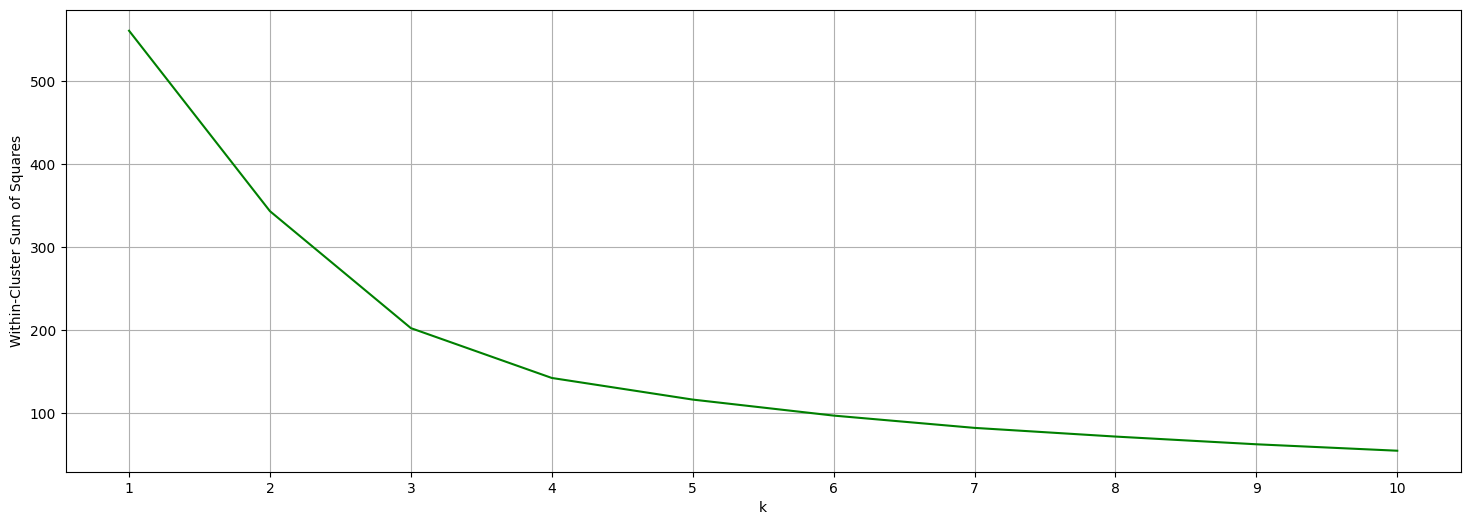

In [46]:
# Ignore future warnings 
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_score = []

for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    inertia_score.append(kmeans.inertia_)

# Visualize
plt.figure(figsize=(18,6))
sns.lineplot(x=range(1,11), y=inertia_score, color="green")
plt.xticks(range(1,11))
plt.xlabel("k")
plt.ylabel("Within-Cluster Sum of Squares")
plt.grid()
plt.show()

The Elbow Plot recommends 3 clusters, as increasing the number of clusters further does not generate a significant decrease in heterogeneity.

In [47]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
# random_state shuffles the data, 42 is gernerally used to randomize data
kmeans.fit(Y)

KMeans(n_clusters=3, random_state=42)

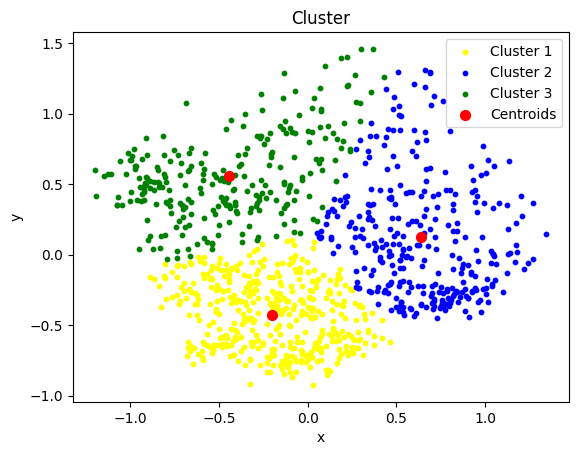

In [48]:
m_kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = m_kmeans.fit_predict(Y)

# Plotting the clusters
colors = ["yellow", "blue", "green"]  # Define colors for each cluster

for cluster_num in range(3):
    plt.scatter(Y[y_kmeans == cluster_num, 0], Y[y_kmeans == cluster_num, 1],
                s=10, c=colors[cluster_num], label="Cluster {}".format(cluster_num + 1))

# Plotting the centroids
plt.scatter(m_kmeans.cluster_centers_[:, 0], m_kmeans.cluster_centers_[:, 1],
            s=50, c="red", label="Centroids")

plt.title("Cluster")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.37621239314759386
For n_clusters = 3 The average silhouette_score is : 0.42652062505381677
For n_clusters = 4 The average silhouette_score is : 0.4226202954006511
For n_clusters = 5 The average silhouette_score is : 0.37671664893785894
For n_clusters = 6 The average silhouette_score is : 0.3906558975634725


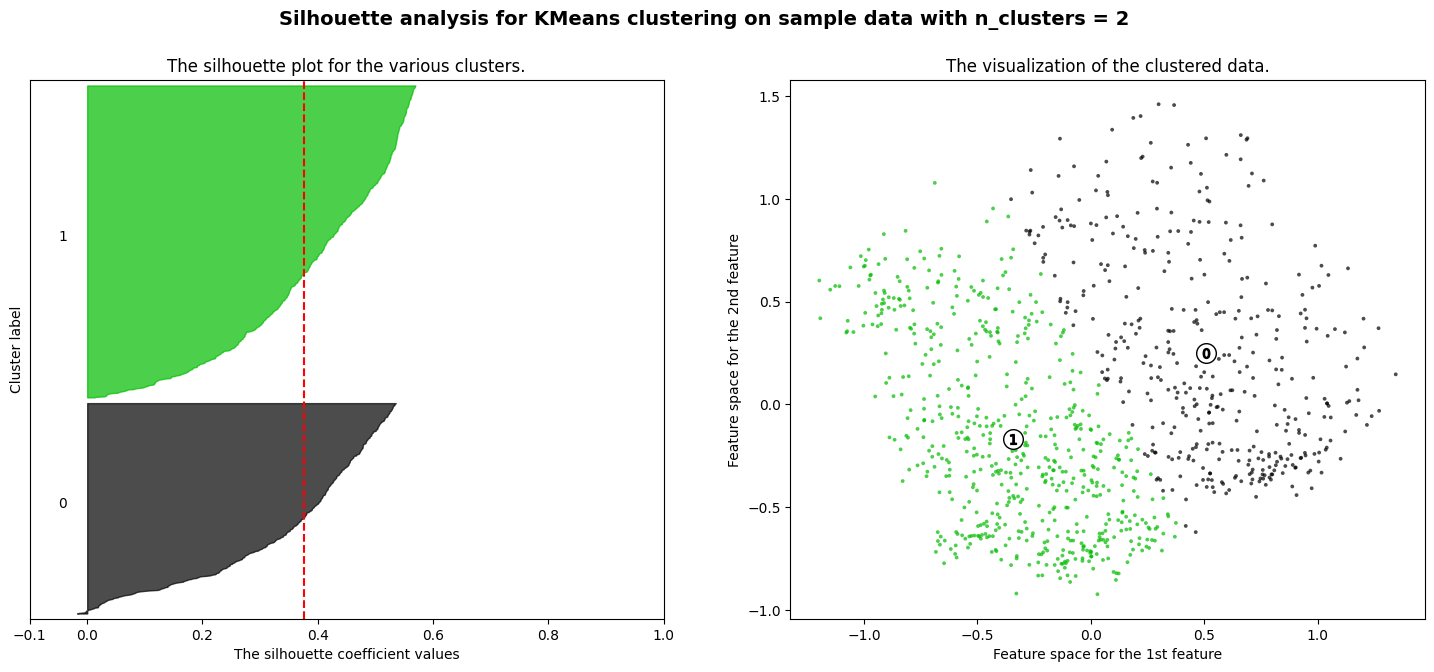

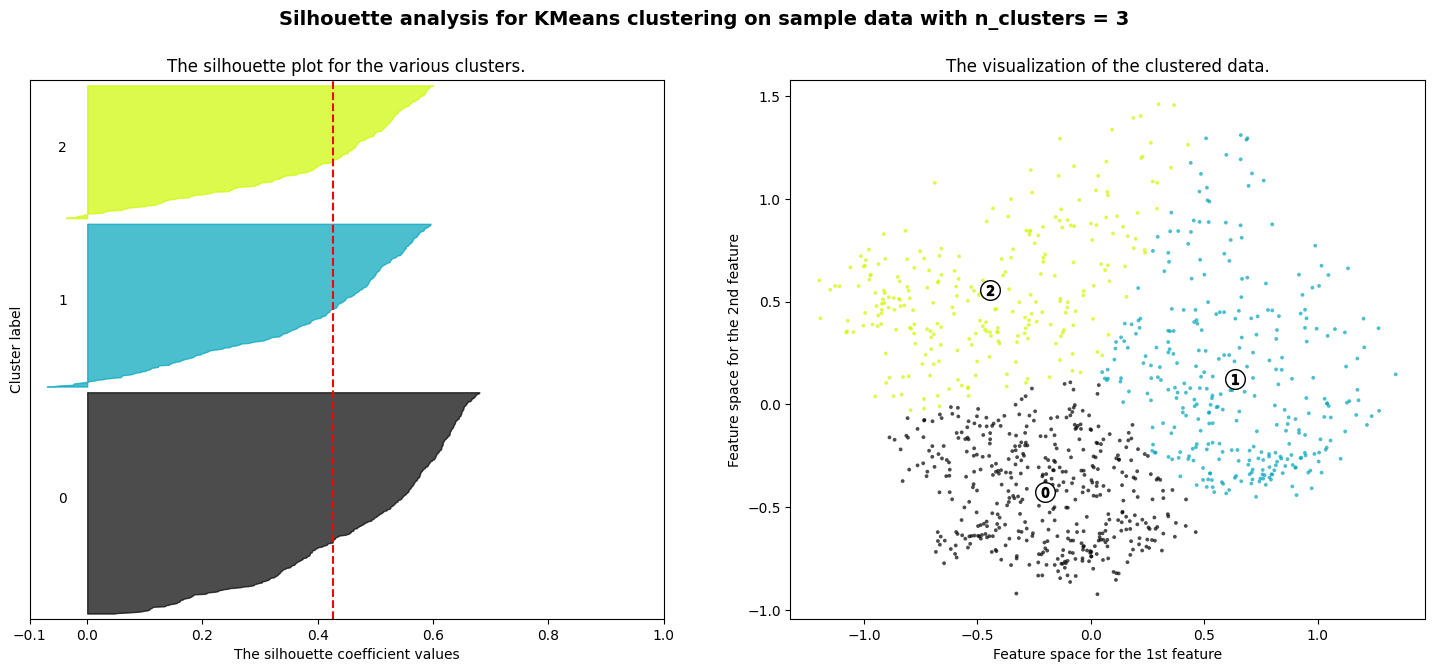

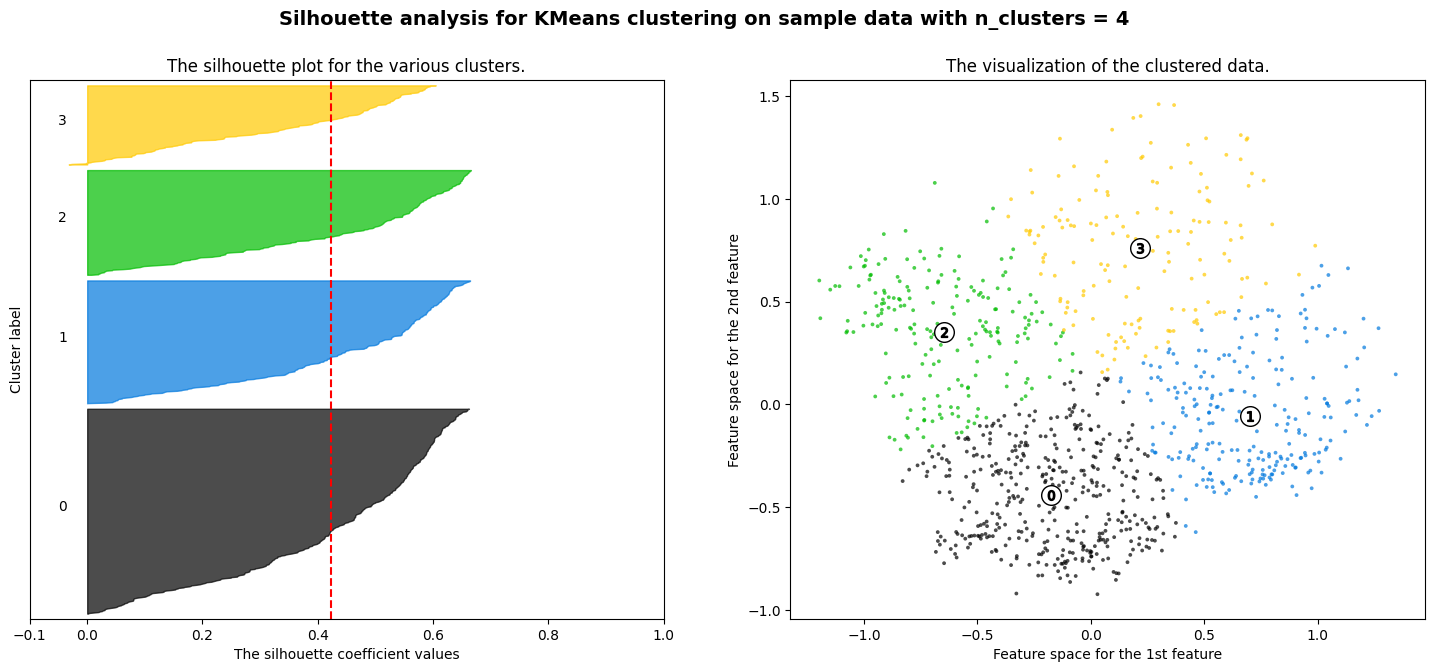

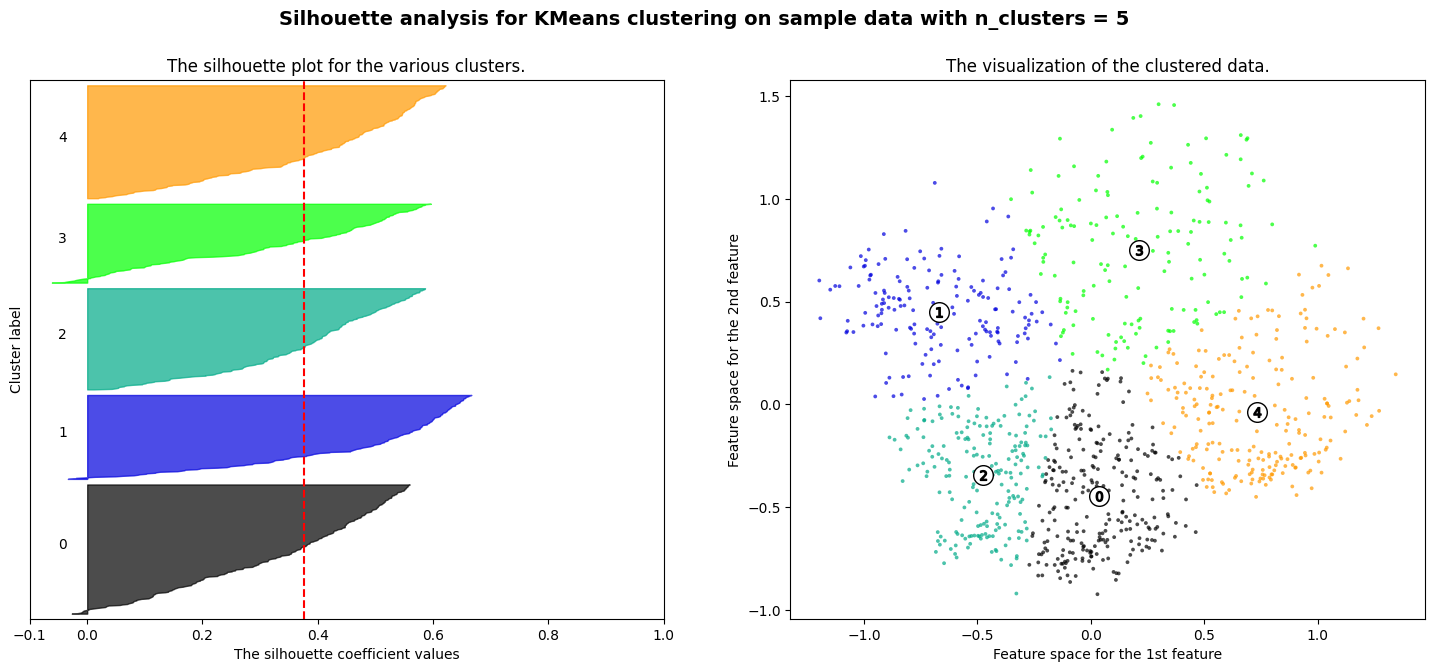

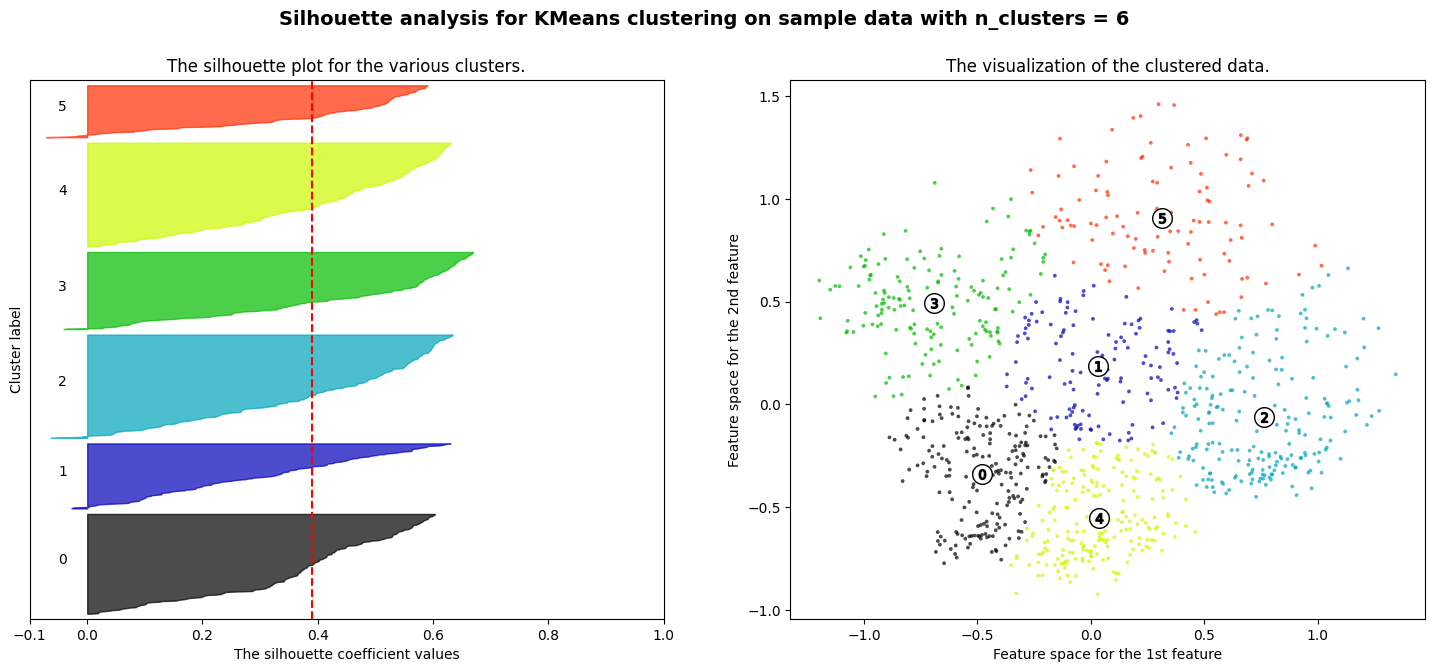

In [49]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Y) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Y)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Y[:, 0], Y[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [50]:
m_kmeans = KMeans(n_clusters = 3, random_state = 10)
y_kmeans = m_kmeans.fit_predict(Y)

In [51]:
# which rows have been assigned to which clusters?

data = pd.DataFrame(Y, columns=["PC"+str(i) for i in range (1,pcadf_fix2.shape[1]+1)])
y_kmean = pd.DataFrame(y_kmeans)
data["Cluster Labels"] = y_kmeans
data

,PC1,PC2,Cluster Labels
0,0.811771,-0.005378,1
1,-1.126665,0.575759,2
2,0.226718,-0.711000,0
3,0.119859,-0.247930,0
4,-0.122858,0.349135,2
...,...,...,...
995,-0.368793,-0.491249,0
996,0.553348,0.438784,1
997,0.064963,-0.671312,0
998,0.274079,0.746419,1


In [52]:
# extract column Cluster Label and add it to the dafa frame
df_cluster = df_scaled.merge(data["Cluster Labels"], left_index=True, right_index=True)
df_cluster

,checking_status,duration,credit_history,purpose,credit_amaount,savings_status,employment,installment_commitment,personal_status,oter_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,Cluster Labels
0,0.333333,0.029412,0.25,0.777778,0.050567,1.0,0.75,1.000000,1.000000,1.0,...,0.857143,0.5,0.5,0.333333,1.000000,0.0,1.0,1.0,1.0,1
1,0.000000,0.647059,0.75,0.777778,0.313690,0.5,0.00,0.333333,0.000000,1.0,...,0.053571,0.5,0.5,0.000000,1.000000,0.0,0.0,1.0,0.0,2
2,1.000000,0.117647,0.25,0.444444,0.101574,0.5,0.25,0.333333,1.000000,1.0,...,0.535714,0.5,0.5,0.000000,0.666667,1.0,0.0,1.0,1.0,0
3,0.333333,0.558824,0.75,0.555556,0.419941,0.5,0.25,0.333333,1.000000,0.5,...,0.464286,0.5,0.0,0.000000,1.000000,1.0,0.0,1.0,1.0,0
4,0.333333,0.294118,0.50,0.111111,0.254209,0.5,0.00,0.666667,1.000000,1.0,...,0.607143,0.5,0.0,0.333333,1.000000,1.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.75,0.555556,0.081765,0.5,0.25,0.666667,0.000000,1.0,...,0.214286,0.5,0.5,0.000000,0.666667,0.0,0.0,1.0,1.0,0
996,0.333333,0.382353,0.75,0.222222,0.198470,0.5,0.00,1.000000,0.333333,1.0,...,0.375000,0.5,0.5,0.000000,0.000000,0.0,1.0,1.0,1.0,1
997,1.000000,0.117647,0.75,0.777778,0.030483,0.5,0.75,1.000000,1.000000,1.0,...,0.339286,0.5,0.5,0.000000,1.000000,0.0,0.0,1.0,1.0,0
998,0.333333,0.602941,0.75,0.777778,0.087763,0.5,0.00,1.000000,1.000000,1.0,...,0.071429,0.5,0.0,0.000000,1.000000,0.0,1.0,1.0,0.0,1


# 5. Decision Tree

In [53]:
#import transformed data set into new df
df_transLab = df_scaled.copy()
df_transLab

,checking_status,duration,credit_history,purpose,credit_amaount,savings_status,employment,installment_commitment,personal_status,oter_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.333333,0.029412,0.25,0.777778,0.050567,1.0,0.75,1.000000,1.000000,1.0,...,0.666667,0.857143,0.5,0.5,0.333333,1.000000,0.0,1.0,1.0,1.0
1,0.000000,0.647059,0.75,0.777778,0.313690,0.5,0.00,0.333333,0.000000,1.0,...,0.666667,0.053571,0.5,0.5,0.000000,1.000000,0.0,0.0,1.0,0.0
2,1.000000,0.117647,0.25,0.444444,0.101574,0.5,0.25,0.333333,1.000000,1.0,...,0.666667,0.535714,0.5,0.5,0.000000,0.666667,1.0,0.0,1.0,1.0
3,0.333333,0.558824,0.75,0.555556,0.419941,0.5,0.25,0.333333,1.000000,0.5,...,0.000000,0.464286,0.5,0.0,0.000000,1.000000,1.0,0.0,1.0,1.0
4,0.333333,0.294118,0.50,0.111111,0.254209,0.5,0.00,0.666667,1.000000,1.0,...,0.333333,0.607143,0.5,0.0,0.333333,1.000000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.75,0.555556,0.081765,0.5,0.25,0.666667,0.000000,1.0,...,0.666667,0.214286,0.5,0.5,0.000000,0.666667,0.0,0.0,1.0,1.0
996,0.333333,0.382353,0.75,0.222222,0.198470,0.5,0.00,1.000000,0.333333,1.0,...,0.000000,0.375000,0.5,0.5,0.000000,0.000000,0.0,1.0,1.0,1.0
997,1.000000,0.117647,0.75,0.777778,0.030483,0.5,0.75,1.000000,1.000000,1.0,...,1.000000,0.339286,0.5,0.5,0.000000,1.000000,0.0,0.0,1.0,1.0
998,0.333333,0.602941,0.75,0.777778,0.087763,0.5,0.00,1.000000,1.000000,1.0,...,0.333333,0.071429,0.5,0.0,0.000000,1.000000,0.0,1.0,1.0,0.0


###  Definition of training data and target data (label)

In [54]:
# Setting the target variable
X = df_transLab.iloc[:, :-1] #.join(df_transLab.iloc[:, -2:]) wenn label nicht in de letzten spalte ist
Y = df_transLab.iloc[:, -1] # as target variable (label)

In [55]:
X # as input variables (training data)

,checking_status,duration,credit_history,purpose,credit_amaount,savings_status,employment,installment_commitment,personal_status,oter_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0.333333,0.029412,0.25,0.777778,0.050567,1.0,0.75,1.000000,1.000000,1.0,1.000000,0.666667,0.857143,0.5,0.5,0.333333,1.000000,0.0,1.0,1.0
1,0.000000,0.647059,0.75,0.777778,0.313690,0.5,0.00,0.333333,0.000000,1.0,0.333333,0.666667,0.053571,0.5,0.5,0.000000,1.000000,0.0,0.0,1.0
2,1.000000,0.117647,0.25,0.444444,0.101574,0.5,0.25,0.333333,1.000000,1.0,0.666667,0.666667,0.535714,0.5,0.5,0.000000,0.666667,1.0,0.0,1.0
3,0.333333,0.558824,0.75,0.555556,0.419941,0.5,0.25,0.333333,1.000000,0.5,1.000000,0.000000,0.464286,0.5,0.0,0.000000,1.000000,1.0,0.0,1.0
4,0.333333,0.294118,0.50,0.111111,0.254209,0.5,0.00,0.666667,1.000000,1.0,1.000000,0.333333,0.607143,0.5,0.0,0.333333,1.000000,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.75,0.555556,0.081765,0.5,0.25,0.666667,0.000000,1.0,1.000000,0.666667,0.214286,0.5,0.5,0.000000,0.666667,0.0,0.0,1.0
996,0.333333,0.382353,0.75,0.222222,0.198470,0.5,0.00,1.000000,0.333333,1.0,1.000000,0.000000,0.375000,0.5,0.5,0.000000,0.000000,0.0,1.0,1.0
997,1.000000,0.117647,0.75,0.777778,0.030483,0.5,0.75,1.000000,1.000000,1.0,1.000000,1.000000,0.339286,0.5,0.5,0.000000,1.000000,0.0,0.0,1.0
998,0.333333,0.602941,0.75,0.777778,0.087763,0.5,0.00,1.000000,1.000000,1.0,1.000000,0.333333,0.071429,0.5,0.0,0.000000,1.000000,0.0,1.0,1.0


In [56]:
Y

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
995    1.0
996    1.0
997    1.0
998    0.0
999    1.0
Name: class, Length: 1000, dtype: float64

In [57]:
Y.value_counts()

class
1.0    700
0.0    300
Name: count, dtype: int64

### 30-70 Split-validation

We split the data into 2/3 training data and 1/3 test data.

In [58]:
# Generate training and testing set (example for split validation)
# X as training data and Y as label is splitted

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.33, random_state=42)

In [59]:
# check the split sets: proportion 1/3 test to 2/3 training
X_train.shape, X_test.shape

((670, 20), (330, 20))

In [60]:
# Decision Tree with Gini Index criterion
# instantiate the DT classifier at dt_gini

from sklearn.tree import DecisionTreeClassifier

# Parameters
dt_gini = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=3,
                                min_samples_split=2, min_samples_leaf=1, random_state=42)

dt_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [61]:
# Predict the Test set results with criterion gini index
Y_pred_gini = dt_gini.predict(X_test)

In [62]:
# Comparison of predicted labels y_ped_gini and real test-labels y_test

from sklearn.metrics import accuracy_score

print('The model accuracy with gini index is: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_gini)))

The model accuracy with gini index is: 0.7000


In [63]:
# Overfitting potential check 
# compare traning to test performance --> indicator for overfitting

print('The accuracy score of the decision tree model is: {0:0.4f}'.format(dt_gini.score(X_train, Y_train)))

The accuracy score of the decision tree model is: 0.7687


- compare accuracy scores
- good accuracy? overfitting? etc?

### Visualisaiton of the gini-based decision tree

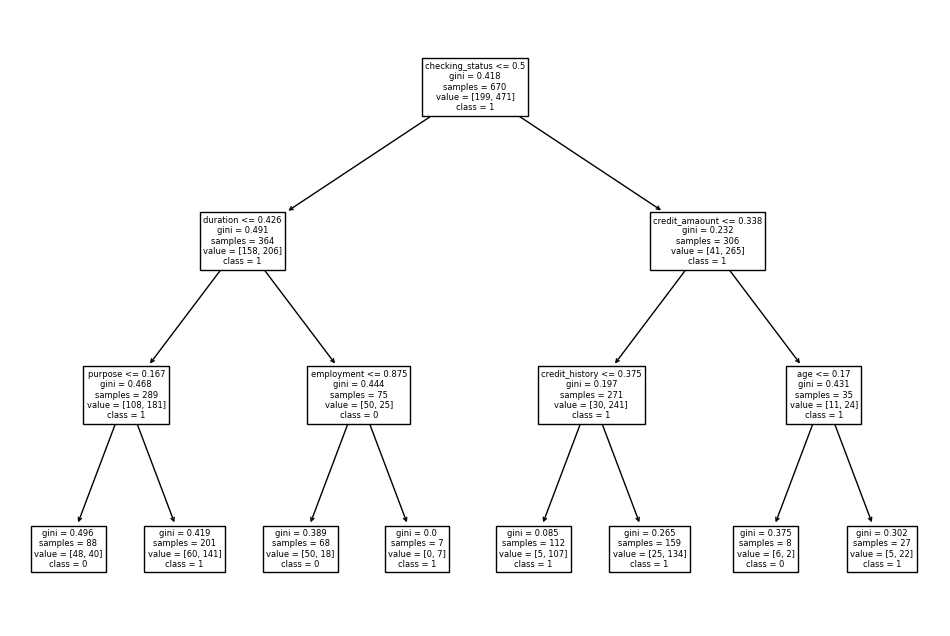

In [64]:
# Visualisaiton of the gini-based decision tree

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt_gini.fit(X_train, Y_train), 
               feature_names=[col for col in df_transLab.columns],
               class_names=["0", "1"]);

### Confusion Matrix 

Text(0.5, 1.0, 'Confusion Matrix')

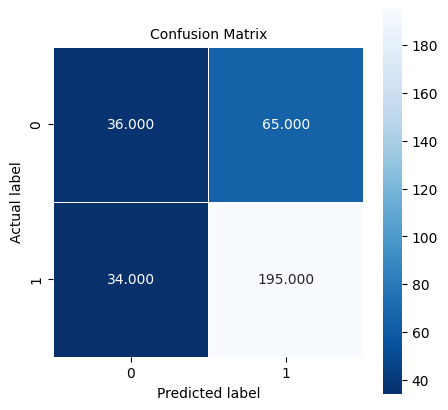

In [65]:
# Displaying the confusion matrix

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

confusion_matrix =metrics.confusion_matrix(Y_test, Y_pred_gini)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "Blues_r")

plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size=10)

### Classification report
Precision: The proportion of the data classified as positive that actually is positive. It represents the accuracy of positive predictions.

Recall: The relative proportion of correctly classified positive data out of all the actual positive data. It represents the ability of the model to correctly identify positive instances.

F1-Score: The harmonic mean of precision and recall.

In [66]:
#Classification report

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_gini))

              precision    recall  f1-score   support

         0.0       0.51      0.36      0.42       101
         1.0       0.75      0.85      0.80       229

    accuracy                           0.70       330
   macro avg       0.63      0.60      0.61       330
weighted avg       0.68      0.70      0.68       330



### Cross-Validation

Testing by cross-validation is needed to avoid overfitting.

Model is trained and tested on a new data composition in each rotation. We use k=10 and check whether there is a variation inbetween the k-folds.

In [67]:
# Libraries for cross validation
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import tree

# 10-fold cross validation
kf= KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1

# Gerneration of folds
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set: {len(test_index)}')
    cnt += 1

Fold:1, Train set: 900, Test set: 100
Fold:2, Train set: 900, Test set: 100
Fold:3, Train set: 900, Test set: 100
Fold:4, Train set: 900, Test set: 100
Fold:5, Train set: 900, Test set: 100
Fold:6, Train set: 900, Test set: 100
Fold:7, Train set: 900, Test set: 100
Fold:8, Train set: 900, Test set: 100
Fold:9, Train set: 900, Test set: 100
Fold:10, Train set: 900, Test set: 100


In [68]:
# Check Overfitting via Cross-Validation

# store respective scores of each crossvalidation variation 
score= cross_val_score(tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=3,
                                                      min_samples_split=2, min_samples_leaf=1,
                                                      random_state=42), X, Y, cv=kf, scoring="accuracy")
print(f'Accuracy scores for each fold are: {score}')
print(f'Average accuracy score: {"{:.4f}".format(score.mean())}')

Accuracy scores for each fold are: [0.78 0.73 0.65 0.68 0.76 0.65 0.76 0.79 0.63 0.77]
Average accuracy score: 0.7200


### Parameter Optimisations


In [69]:
# Parameter Optimisations

# prediction accuracy can be elevated by using different depths
max_depth=[2,3,4,5,6,7,8]
for val in max_depth:
    score= cross_val_score(tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=val,
                                                      min_samples_split=2, min_samples_leaf=1,
                                                      random_state=42), X, Y, cv=kf, scoring="accuracy")
    print(score.mean())

0.7140000000000001
0.72
0.715
0.712
0.691
0.7050000000000001
0.688


### DT-Generation without pre-set parameters
The decision tree without pre-set parameters has a complex structure, no interpretability, misses generalizability and brings the risk of overfitting.

In [70]:
# dt_noparam is the tree without pre-set parameters
dt_noparam = DecisionTreeClassifier(criterion='gini', splitter = 'best', random_state = 0)
dt_noparam.fit(X_train, Y_train)

# Predict the Test set results with criterion gini indes
Y_pred = dt_noparam.predict(X_test)

print('The model accuracy with gini index is: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)))

The model accuracy with gini index is: 0.7000


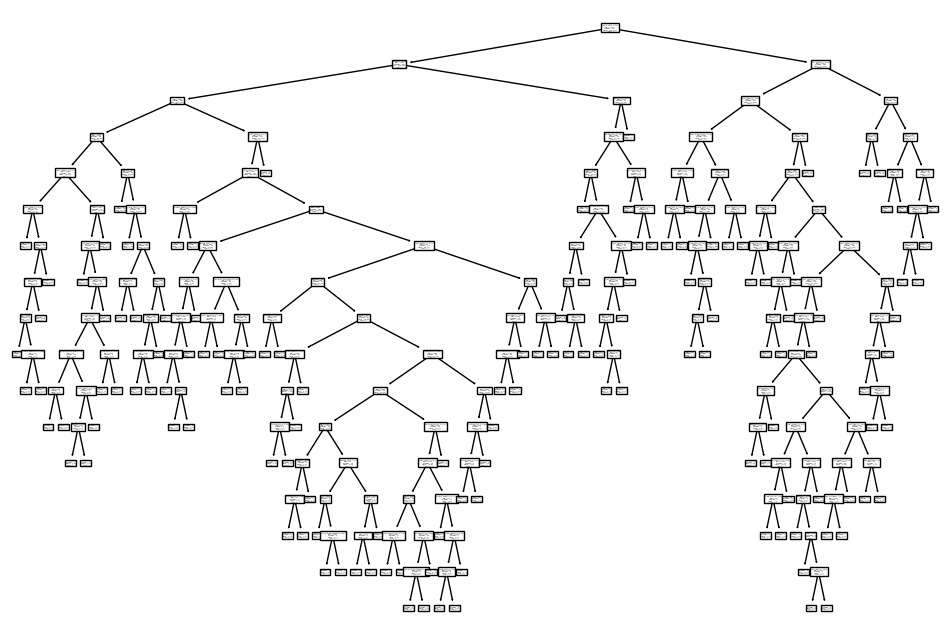

In [71]:
# Visualize the decision tree without pre-set parameters
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt_noparam.fit(X_train, Y_train), 
               feature_names=[col for col in df_transLab.columns], class_names=["0", "1"])

plt.show()

### Pruning (Forward Pruning)

Pruning is a process of selectively removing certain parts of a tree, such as branches, to improve the structure of the tree and promote good growth.
We adopt pruning to our desicion tree to avoid overfitting.

In [72]:
# Pruning Application

# we limit the growth of the tree by setting contraints for control variables and use GridSearch for pre-pruning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# defines params containing different combinations of the parameters
params= {"max_depth":[2,3,4,5,6,7], "min_samples_split" : [2,3,4], "min_samples_leaf":[1,2]}

# tree to be tuned without parameters
clf= tree.DecisionTreeClassifier()

# search for the best parameter constellation
gcv=GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [73]:
# recommended constellation of parameters
gcv.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}

Test score: 0.6878787878787879


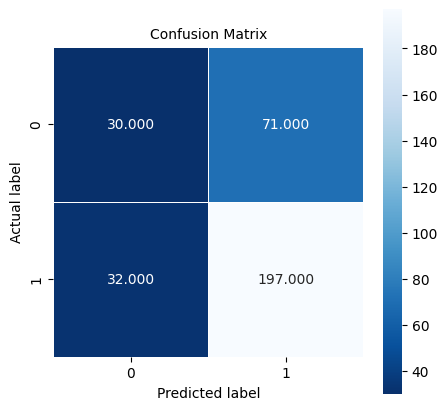

In [74]:
# calculate performance score again  with results from above --> trained model with optimized parameters?
model= gcv.best_estimator_
model.fit(X_train, Y_train)

# use test data set
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(Y_test, Y_test_pred)

# use confusion matrix from above to see model performance
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size=10)

# accuracy score 
print(f'Test score: {accuracy_score(Y_test, Y_test_pred )}')

### Visualisation of the pruned decision tree

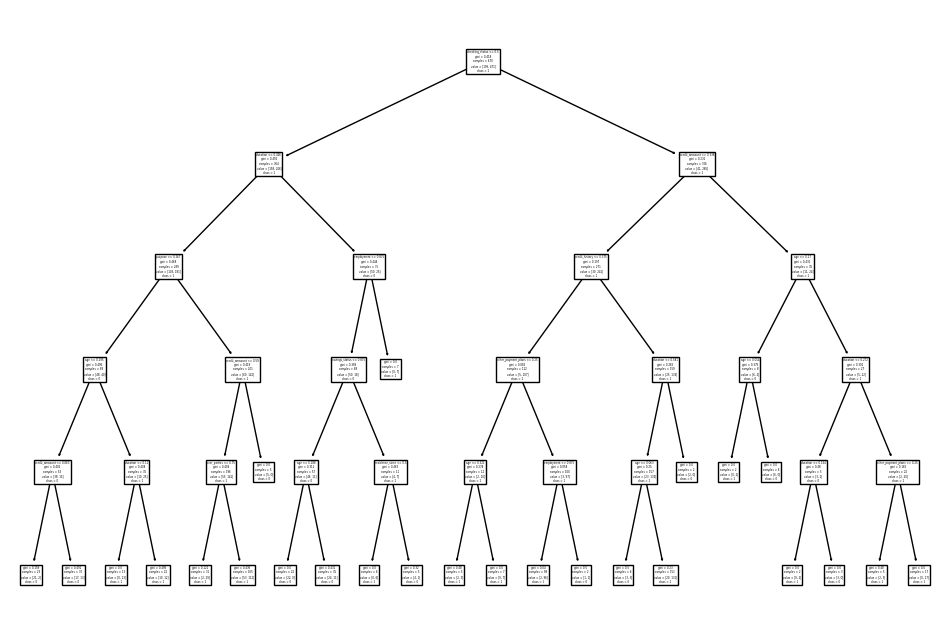

In [75]:
# Visualisation of the pruned decision tree

# vizualize as desicion tree using new "model" instead of dt_gini.fit(X_train, Y_train) from above
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model, feature_names=[col for col in df_transLab.columns],
               class_names=["0", "1"])

# result is an optimized desicion tree
plt.show()

In [76]:
# Visualtisation of the decision rules as text

text_representation= tree.export_text(model, feature_names=[col for col in df_transLab.columns[:-1]])



print(text_representation)

|--- checking_status <= 0.50
|   |--- duration <= 0.43
|   |   |--- purpose <= 0.17
|   |   |   |--- age <= 0.29
|   |   |   |   |--- credit_amaount <= 0.06
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- credit_amaount >  0.06
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- age >  0.29
|   |   |   |   |--- duration <= 0.11
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- duration >  0.11
|   |   |   |   |   |--- class: 1.0
|   |   |--- purpose >  0.17
|   |   |   |--- credit_amaount <= 0.59
|   |   |   |   |--- oter_parties <= 0.75
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- oter_parties >  0.75
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- credit_amaount >  0.59
|   |   |   |   |--- class: 0.0
|   |--- duration >  0.43
|   |   |--- employment <= 0.88
|   |   |   |--- savings_status <= 0.88
|   |   |   |   |--- age <= 0.19
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- age >  0.19
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- 

### Classification report

In [77]:
#Classification report

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       0.48      0.30      0.37       101
         1.0       0.74      0.86      0.79       229

    accuracy                           0.69       330
   macro avg       0.61      0.58      0.58       330
weighted avg       0.66      0.69      0.66       330

